# Tokenization in Natural Language Processing (NLP)

## What is Tokenization?

**Tokenization** is the process of breaking down text into smaller units called **tokens**. These tokens can be words, sentences, characters, or subwords. It's one of the fundamental preprocessing steps in NLP.

### Why is Tokenization Important?

1. **Text Analysis**: Makes text data easier to analyze and process
2. **Feature Extraction**: Helps convert text into numerical features for machine learning
3. **Pattern Recognition**: Enables identification of patterns and structures in text
4. **Language Understanding**: Foundation for tasks like sentiment analysis, translation, etc.

### Types of Tokenization:

1. **Word Tokenization**: Splits text into individual words
2. **Sentence Tokenization**: Splits text into sentences
3. **Character Tokenization**: Splits text into individual characters
4. **Subword Tokenization**: Splits words into meaningful subunits (advanced)

Let's explore each type with practical examples using NLTK!

## 1. Setup and Installation

First, let's install and import the necessary libraries.

In [1]:
# Install NLTK if not already installed
# !pip install nltk

import nltk
import warnings
warnings.filterwarnings('ignore')

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')

print("NLTK Setup Complete!")

NLTK Setup Complete!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mahes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mahes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## 2. Word Tokenization

Word tokenization breaks text into individual words or tokens. NLTK provides multiple methods for word tokenization.

### 2.1 Using word_tokenize() - Most Common Method

In [2]:
from nltk.tokenize import word_tokenize

# Sample text
text = "Natural Language Processing is amazing! It's used in AI, ML, and many other fields."

# Tokenize the text
tokens = word_tokenize(text)

print("Original Text:")
print(text)
print("\nTokens:")
print(tokens)
print(f"\nTotal number of tokens: {len(tokens)}")

Original Text:
Natural Language Processing is amazing! It's used in AI, ML, and many other fields.

Tokens:
['Natural', 'Language', 'Processing', 'is', 'amazing', '!', 'It', "'s", 'used', 'in', 'AI', ',', 'ML', ',', 'and', 'many', 'other', 'fields', '.']

Total number of tokens: 19


In [3]:
print("Tokens:")
for token in tokens:
    print(token)

Tokens:
Natural
Language
Processing
is
amazing
!
It
's
used
in
AI
,
ML
,
and
many
other
fields
.


**Key Observations:**
- Punctuation marks are treated as separate tokens
- Contractions like "It's" are split into "It" and "'s"
- Special characters are preserved

### 2.2 Using WordPunctTokenizer - Alternative Method

In [4]:
from nltk.tokenize import WordPunctTokenizer

text = "Don't worry! Python's NLTK makes tokenization easy."

# Using WordPunctTokenizer
tokenizer = WordPunctTokenizer()
tokens = tokenizer.tokenize(text)


print("Text:", text)
print("\nTokens using WordPunctTokenizer:")
for token in tokens:
    print(token)

Text: Don't worry! Python's NLTK makes tokenization easy.

Tokens using WordPunctTokenizer:
Don
'
t
worry
!
Python
'
s
NLTK
makes
tokenization
easy
.


**Note:** WordPunctTokenizer splits on punctuation but keeps them as separate tokens.

### 2.3 Using TreebankWordTokenizer

In [5]:
from nltk.tokenize import TreebankWordTokenizer

text = "We're learning NLP! Isn't it great?"

# Using TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)

print("Text:", text)
print("\nTokens using TreebankWordTokenizer:")
for token in tokens:
    print(token)

Text: We're learning NLP! Isn't it great?

Tokens using TreebankWordTokenizer:
We
're
learning
NLP
!
Is
n't
it
great
?


Key observations and explanations:
- Tokenizer follows Penn Treebank conventions: it separates contractions into the main word and the contraction suffix. Examples:
  - "We're" → "We" and "'re" (apostrophe attached to second token)
  - "Isn't" → "Is" and "n't"
- Punctuation is split into its own tokens: "!" and "?" are separate from words.
- Capitalization is preserved in tokens as-is (e.g., "We", "Is", "NLP").
- Abbreviations or acronyms like "NLP" are kept as a single token.
- This tokenization is helpful for tasks that need explicit contraction parts (e.g., POS tagging, parsing) because the contraction pieces carry grammatical information (e.g., "'re" → auxiliary verb).
- Downsides for some tasks:
  - If you want surface-level text (exact original strings) or downstream frequency counts where contractions should be one token, this split may be undesirable.
  - For language modeling or embeddings, you may want to normalize contractions (merge) or expand them (e.g., "isn't" → "is not") depending on your pipeline.


### 2.4 Comparison of Different Word Tokenizers

In [6]:
text = "She said, \"Hello! How's everything going?\""

print("Original Text:", text)
print("\n" + "="*60)

# word_tokenize
print("\n1. word_tokenize():")
for token in word_tokenize(text):
    print(token)

# WordPunctTokenizer
print("\n2. WordPunctTokenizer:")
wpt = WordPunctTokenizer()
for token in wpt.tokenize(text):
    print(token)

# TreebankWordTokenizer
print("\n3. TreebankWordTokenizer:")
tbt = TreebankWordTokenizer()
for token in tbt.tokenize(text):
    print(token)

Original Text: She said, "Hello! How's everything going?"


1. word_tokenize():
She
said
,
``
Hello
!
How
's
everything
going
?
''

2. WordPunctTokenizer:
She
said
,
"
Hello
!
How
'
s
everything
going
?"

3. TreebankWordTokenizer:
She
said
,
``
Hello
!
How
's
everything
going
?
''


In [8]:
text = "She said, \"Hello! How's everything going?\""

print("Original Text:", text)
print("\n" + "="*60)

# word_tokenize
print("\n1. word_tokenize():")
print(word_tokenize(text))

# WordPunctTokenizer
print("\n2. WordPunctTokenizer:")
wpt = WordPunctTokenizer()
print(wpt.tokenize(text))

# TreebankWordTokenizer
print("\n3. TreebankWordTokenizer:")
tbt = TreebankWordTokenizer()
print(tbt.tokenize(text))

Original Text: She said, "Hello! How's everything going?"


1. word_tokenize():
['She', 'said', ',', '``', 'Hello', '!', 'How', "'s", 'everything', 'going', '?', "''"]

2. WordPunctTokenizer:
['She', 'said', ',', '"', 'Hello', '!', 'How', "'", 's', 'everything', 'going', '?"']

3. TreebankWordTokenizer:
['She', 'said', ',', '``', 'Hello', '!', 'How', "'s", 'everything', 'going', '?', "''"]


## 3. Sentence Tokenization

Sentence tokenization splits text into individual sentences. This is crucial for many NLP tasks.

### 3.1 Using sent_tokenize()

In [13]:
from nltk.tokenize import sent_tokenize

# Sample paragraph
text = """Natural Language Processing is fascinating. It helps computers understand human language. 
NLP has many applications like chatbots, translation, and sentiment analysis. 
Dr. Smith says, "NLP will revolutionize AI." What do you think?"""

# Tokenize into sentences
sentences = sent_tokenize(text)

print("Original Text:")
print(text)
print("\n" + "="*60)
print("\nSentences:")

for i, sentence in enumerate(sentences, 1):
    print(f"{i}. {sentence}")

Original Text:
Natural Language Processing is fascinating. It helps computers understand human language. 
NLP has many applications like chatbots, translation, and sentiment analysis. 
Dr. Smith says, "NLP will revolutionize AI." What do you think?


Sentences:
1. Natural Language Processing is fascinating.
2. It helps computers understand human language.
3. NLP has many applications like chatbots, translation, and sentiment analysis.
4. Dr. Smith says, "NLP will revolutionize AI."
5. What do you think?


**Key Points:**
- Handles abbreviations like "Dr." correctly
- Recognizes sentence boundaries with periods, question marks, and exclamation marks
- Smart enough to handle quotes and special cases

### 3.2 Handling Complex Cases

In [17]:
# Complex text with abbreviations, decimals, etc.
text = """Mr. Johnson works at XYZ Corp. He earned $1000.50 last week. 
His email is john@example.com. He said, "I love Python 3.9!" 
The meeting is at 3 p.m. tomorrow."""

sentences = sent_tokenize(text)

print("Complex Text Sentence Tokenization:")
print("="*60)

for i, sentence in enumerate(sentences, 1):
    print(f"{i}. {sentence}")

Complex Text Sentence Tokenization:
1. Mr. Johnson works at XYZ Corp.
2. He earned $1000.50 last week.
3. His email is john@example.com.
4. He said, "I love Python 3.9!"
5. The meeting is at 3 p.m. tomorrow.


## 4. Whitespace Tokenization

Simple tokenization based on whitespace characters.

In [18]:
from nltk.tokenize import WhitespaceTokenizer

text = "Python   is    awesome!   Let's     learn   NLP."

tokenizer = WhitespaceTokenizer()
tokens = tokenizer.tokenize(text)

print("Text:", text)
print("\nTokens using WhitespaceTokenizer:")
print(tokens)
print(f"\nNumber of tokens: {len(tokens)}")

# Compare with simple split()
print("\n" + "="*60)
print("Comparison with Python's split():")
print(text.split())

Text: Python   is    awesome!   Let's     learn   NLP.

Tokens using WhitespaceTokenizer:
['Python', 'is', 'awesome!', "Let's", 'learn', 'NLP.']

Number of tokens: 6

Comparison with Python's split():
['Python', 'is', 'awesome!', "Let's", 'learn', 'NLP.']


## 5. Regular Expression Tokenization

Using regex patterns for custom tokenization rules.

In [19]:
from nltk.tokenize import RegexpTokenizer

text = "Hello! My email is user123@example.com and phone is 123-456-7890."

# Example 1: Only words (no punctuation)
tokenizer1 = RegexpTokenizer(r'\w+')
tokens1 = tokenizer1.tokenize(text)

print("Text:", text)
print("\n1. Only words (\\w+):")
print(tokens1)

# Example 2: Words with hyphens
tokenizer2 = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')
tokens2 = tokenizer2.tokenize(text)

print("\n2. Words, numbers, and special characters:")
print(tokens2)

# Example 3: Extract only email and phone patterns
import re
emails = re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', text)
phones = re.findall(r'\b\d{3}-\d{3}-\d{4}\b', text)

print("\n3. Extracted Emails:", emails)
print("   Extracted Phones:", phones)

Text: Hello! My email is user123@example.com and phone is 123-456-7890.

1. Only words (\w+):
['Hello', 'My', 'email', 'is', 'user123', 'example', 'com', 'and', 'phone', 'is', '123', '456', '7890']

2. Words, numbers, and special characters:
['Hello', '!', 'My', 'email', 'is', 'user123', '@example.com', 'and', 'phone', 'is', '123', '-456-7890.']

3. Extracted Emails: ['user123@example.com']
   Extracted Phones: ['123-456-7890']


## 6. Tokenizing Multi-line Text and Documents

In [28]:
# Multi-line document
document = """
Artificial Intelligence (AI) is transforming the world.
Machine Learning is a subset of AI. Deep Learning is a subset of ML.

Key AI Applications:
1. Natural Language Processing
2. Computer Vision
3. Robotics

The future of AI looks promising!
"""

print("Document Tokenization")
print("="*60)

# Sentence tokenization
sentences = sent_tokenize(document)
print(f"\nTotal Sentences: {len(sentences)}\n")

# Word tokenization for the entire document
all_words = word_tokenize(document)
print(f"Total Words: {len(all_words)}\n")

# Sentence and word count combined
print("Detailed Analysis:")
for i, sentence in enumerate(sentences, 1):
    words = word_tokenize(sentence)
    print(f"Sentence {i} ({len(words)} words): {sentence.strip()}")
    print(f"Words {words} \n\n\n")

Document Tokenization

Total Sentences: 7

Total Words: 49

Detailed Analysis:
Sentence 1 (10 words): Artificial Intelligence (AI) is transforming the world.
Words ['Artificial', 'Intelligence', '(', 'AI', ')', 'is', 'transforming', 'the', 'world', '.'] 



Sentence 2 (8 words): Machine Learning is a subset of AI.
Words ['Machine', 'Learning', 'is', 'a', 'subset', 'of', 'AI', '.'] 



Sentence 3 (8 words): Deep Learning is a subset of ML.
Words ['Deep', 'Learning', 'is', 'a', 'subset', 'of', 'ML', '.'] 



Sentence 4 (6 words): Key AI Applications:
1.
Words ['Key', 'AI', 'Applications', ':', '1', '.'] 



Sentence 5 (5 words): Natural Language Processing
2.
Words ['Natural', 'Language', 'Processing', '2', '.'] 



Sentence 6 (4 words): Computer Vision
3.
Words ['Computer', 'Vision', '3', '.'] 



Sentence 7 (8 words): Robotics

The future of AI looks promising!
Words ['Robotics', 'The', 'future', 'of', 'AI', 'looks', 'promising', '!'] 





## 7. Handling Special Cases and Edge Cases

### 7.1 URLs, Emails, and Social Media Handles

In [31]:
from nltk.tokenize import TweetTokenizer

# Text with URLs, emails, and mentions
text = "Check out https://www.python.org! Contact me at user@email.com or @john_doe #NLP #Python"

print("Original Text:")
print(text)
print("\n" + "="*60)

# Standard word tokenization
print("\n1. Standard word_tokenize():")
tokens1 = word_tokenize(text)
print(tokens1)

# Tweet Tokenizer (better for social media)
print("\n2. TweetTokenizer (preserves hashtags, mentions, etc.):")
tweet_tokenizer = TweetTokenizer()
tokens2 = tweet_tokenizer.tokenize(text)
print(tokens2)

Original Text:
Check out https://www.python.org! Contact me at user@email.com or @john_doe #NLP #Python


1. Standard word_tokenize():
['Check', 'out', 'https', ':', '//www.python.org', '!', 'Contact', 'me', 'at', 'user', '@', 'email.com', 'or', '@', 'john_doe', '#', 'NLP', '#', 'Python']

2. TweetTokenizer (preserves hashtags, mentions, etc.):
['Check', 'out', 'https://www.python.org', '!', 'Contact', 'me', 'at', 'user@email.com', 'or', '@john_doe', '#NLP', '#Python']


### 7.2 Numbers, Dates, and Currency

In [32]:
text = "The price is $1,234.56. Meeting on 2024-01-15 at 3:30 PM. Call 555-123-4567."

tokens = word_tokenize(text)

print("Text:", text)
print("\nTokens:")
print(tokens)

Text: The price is $1,234.56. Meeting on 2024-01-15 at 3:30 PM. Call 555-123-4567.

Tokens:
['The', 'price', 'is', '$', '1,234.56', '.', 'Meeting', 'on', '2024-01-15', 'at', '3:30', 'PM', '.', 'Call', '555-123-4567', '.']


Observations:
- Currency symbols and amounts are split
- Dates with hyphens are preserved
- Phone numbers maintain their structure
- Commas in numbers are separated

### 7.3 Contractions and Possessives

In [36]:
text = "I'm learning NLP. It's John's book. They've, we'll, and won't study together."

tokens = word_tokenize(text)

print("Text:", text)
print("\nTokens:")
print(tokens)

Text: I'm learning NLP. It's John's book. They've, we'll, and won't study together.

Tokens:
['I', "'m", 'learning', 'NLP', '.', 'It', "'s", 'John', "'s", 'book', '.', 'They', "'ve", ',', 'we', "'ll", ',', 'and', 'wo', "n't", 'study', 'together', '.']


How contractions are handled:

  I'm → ['I', "'m'"]
  
  It's → ['It', "'s'"]
  
  John's → ['John', "'s'"]
  
  They've → ['They', "'ve'"]
  
  we'll → ['we', "'ll'"]
  
  won't → ['wo', "n't'"]

## 8. Practical Applications and Real-World Examples

### 8.1 Building a Simple Text Statistics Tool

In [38]:
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter

def analyze_text(text):
    """Analyze text and return statistics"""
    
    # Tokenization
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    
    # Filter only alphabetic words
    words_only = [word.lower() for word in words if word.isalpha()]
    
    # Calculate statistics
    stats = {
        'total_characters': len(text),
        'total_sentences': len(sentences),
        'total_tokens': len(words),
        'total_words': len(words_only),
        'unique_words': len(set(words_only)),
        'avg_sentence_length': len(words) / len(sentences) if sentences else 0,
        'avg_word_length': sum(len(word) for word in words_only) / len(words_only) if words_only else 0
    }
    
    # Most common words
    word_freq = Counter(words_only)
    stats['top_5_words'] = word_freq.most_common(5)
    
    return stats


# Example text
text = """
Python is an amazing programming language. It is versatile and powerful.
Python is used in web development, data science, artificial intelligence, and more.
Many developers love Python because it is easy to learn and has a great community.
Python's simplicity makes it perfect for beginners and experts alike.
"""

stats = analyze_text(text)

print("TEXT ANALYSIS RESULTS")
print("="*60)
for key, value in stats.items():
    if key != 'top_5_words':
        print(f"{key.replace('_', ' ').title()}: {value:.2f}" if isinstance(value, float) else f"{key.replace('_', ' ').title()}: {value}")


print("\nTop 5 Most Common Words:")
for word, count in stats['top_5_words']:
    print(f"  '{word}': {count} times")

TEXT ANALYSIS RESULTS
Total Characters: 311
Total Sentences: 5
Total Tokens: 57
Total Words: 48
Unique Words: 37
Avg Sentence Length: 11.40
Avg Word Length: 5.25

Top 5 Most Common Words:
  'python': 4 times
  'is': 4 times
  'and': 4 times
  'it': 3 times
  'an': 1 times


### 8.2 Word Frequency Analysis

Top 10 Most Frequent Words:
[('learning', 7), ('machine', 4), ('deep', 3), ('is', 2), ('a', 2), ('subset', 2), ('of', 2), ('are', 2), ('artificial', 1), ('intelligence', 1)]
learning        | ███████ (7)
machine         | ████ (4)
deep            | ███ (3)
is              | ██ (2)
a               | ██ (2)
subset          | ██ (2)
of              | ██ (2)
are             | ██ (2)
artificial      | █ (1)
intelligence    | █ (1)


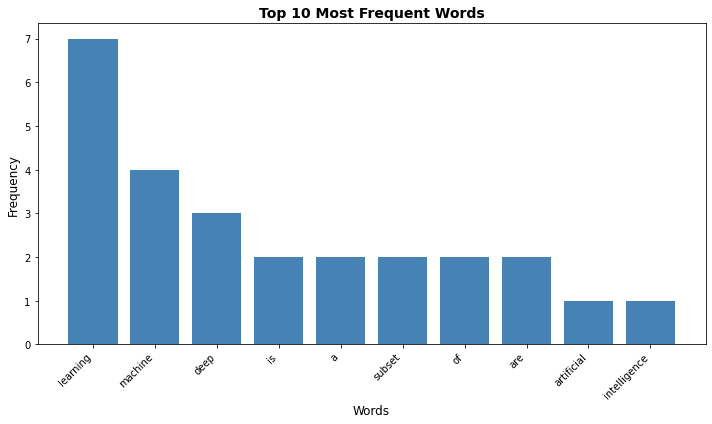

In [49]:
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

text = """
Machine learning is a subset of artificial intelligence. Machine learning 
algorithms learn from data. Deep learning is a subset of machine learning.
Neural networks are used in deep learning. Machine learning and deep learning 
are revolutionizing technology.
"""

# Tokenize and clean
words = word_tokenize(text)
words = [word.lower() for word in words if word.isalpha()]

word_freq = Counter(words)

# Get top 10 words
top_words = word_freq.most_common(10)

print("Top 10 Most Frequent Words:")
print("="*60)
print(top_words)

for word, count in top_words:
    print(f"{word:15} | {'█' * count} ({count})")

# Visualize
word_list, counts = zip(*top_words)
plt.figure(figsize=(10, 6))
plt.bar(word_list, counts, color='steelblue')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 10 Most Frequent Words', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 8.3 N-gram Generation (Bigrams and Trigrams)

In [51]:
from nltk.tokenize import word_tokenize
from nltk import bigrams, trigrams
from collections import Counter

text = "Natural language processing with Python is fun. Python makes NLP easy and accessible."

# Tokenize
words = word_tokenize(text.lower())

# Generate bigrams (2-word combinations)
bigram_list = list(bigrams(words))
print("BIGRAMS (2-word combinations):")
print("="*60)
for bg in bigram_list[:10]:
    print(bg)

print("\n" + "="*60)

# Generate trigrams (3-word combinations)
trigram_list = list(trigrams(words))
print("\nTRIGRAMS (3-word combinations):")
print("="*60)
for tg in trigram_list[:10]:
    print(tg)

# Most common bigrams
print("\n" + "="*60)
bigram_freq = Counter(bigram_list)
print("\nMost Common Bigrams:")
for bg, count in bigram_freq.most_common(5):
    print(f"  {bg}: {count}")

BIGRAMS (2-word combinations):
('natural', 'language')
('language', 'processing')
('processing', 'with')
('with', 'python')
('python', 'is')
('is', 'fun')
('fun', '.')
('.', 'python')
('python', 'makes')
('makes', 'nlp')


TRIGRAMS (3-word combinations):
('natural', 'language', 'processing')
('language', 'processing', 'with')
('processing', 'with', 'python')
('with', 'python', 'is')
('python', 'is', 'fun')
('is', 'fun', '.')
('fun', '.', 'python')
('.', 'python', 'makes')
('python', 'makes', 'nlp')
('makes', 'nlp', 'easy')


Most Common Bigrams:
  ('natural', 'language'): 1
  ('language', 'processing'): 1
  ('processing', 'with'): 1
  ('with', 'python'): 1
  ('python', 'is'): 1


## 9. Advanced Tokenization Techniques

### 9.1 Tokenization with POS (Part-of-Speech) Tags

In [52]:
import nltk
from nltk.tokenize import word_tokenize

# Download required data
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

text = "Python is a powerful programming language. Developers love using Python."

# Tokenize
tokens = word_tokenize(text)

# POS tagging
pos_tags = nltk.pos_tag(tokens)

print("TOKENIZATION WITH POS TAGS")
print("="*60)
print(f"{'Token':<20} {'POS Tag':<10} {'Description':<30}")
print("-"*60)

# Common POS tag meanings
pos_meanings = {
    'NN': 'Noun, singular',
    'NNS': 'Noun, plural',
    'VB': 'Verb, base form',
    'VBZ': 'Verb, 3rd person singular',
    'VBG': 'Verb, gerund',
    'JJ': 'Adjective',
    'DT': 'Determiner',
    'IN': 'Preposition',
    'CC': 'Coordinating conjunction',
    '.': 'Punctuation'
}

for token, tag in pos_tags:
    description = pos_meanings.get(tag, 'Other')
    print(f"{token:<20} {tag:<10} {description:<30}")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mahes\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\mahes\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


TOKENIZATION WITH POS TAGS
Token                POS Tag    Description                   
------------------------------------------------------------
Python               NNP        Other                         
is                   VBZ        Verb, 3rd person singular     
a                    DT         Determiner                    
powerful             JJ         Adjective                     
programming          JJ         Adjective                     
language             NN         Noun, singular                
.                    .          Punctuation                   
Developers           NNP        Other                         
love                 VBP        Other                         
using                VBG        Verb, gerund                  
Python               NNP        Other                         
.                    .          Punctuation                   


### 9.2 Custom Tokenizer Creation

In [53]:
import re
from nltk.tokenize import RegexpTokenizer

class CustomTokenizer:
    """Custom tokenizer with specific rules"""
    
    def __init__(self):
        # Preserve emails, URLs, numbers, and words
        self.pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b|http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|\d+\.?\d*|\w+'
        self.tokenizer = RegexpTokenizer(self.pattern)
    
    def tokenize(self, text):
        return self.tokenizer.tokenize(text)
    
    def tokenize_with_types(self, text):
        """Tokenize and classify token types"""
        tokens = self.tokenize(text)
        classified = []
        
        for token in tokens:
            if re.match(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', token):
                classified.append((token, 'EMAIL'))
            elif re.match(r'http[s]?://', token):
                classified.append((token, 'URL'))
            elif re.match(r'^\d+\.?\d*$', token):
                classified.append((token, 'NUMBER'))
            elif re.match(r'^\w+$', token):
                classified.append((token, 'WORD'))
            else:
                classified.append((token, 'OTHER'))
        
        return classified

# Test the custom tokenizer
text = "Contact us at support@company.com or visit https://example.com. Price: $99.99"

tokenizer = CustomTokenizer()
tokens = tokenizer.tokenize_with_types(text)

print("CUSTOM TOKENIZATION WITH TYPE CLASSIFICATION")
print("="*60)
print(f"{'Token':<30} {'Type':<15}")
print("-"*60)
for token, token_type in tokens:
    print(f"{token:<30} {token_type:<15}")

CUSTOM TOKENIZATION WITH TYPE CLASSIFICATION
Token                          Type           
------------------------------------------------------------
Contact                        WORD           
us                             WORD           
at                             WORD           
support@company.com            EMAIL          
or                             WORD           
visit                          WORD           
https://example.com.           URL            
Price                          WORD           
99.99                          NUMBER         


## 10. Performance Comparison of Different Tokenizers

In [54]:
import time
from nltk.tokenize import word_tokenize, WordPunctTokenizer, TreebankWordTokenizer, WhitespaceTokenizer

# Generate a larger text for performance testing
large_text = """Natural Language Processing is a fascinating field of study. """ * 1000

tokenizers = {
    'word_tokenize': lambda text: word_tokenize(text),
    'WordPunctTokenizer': lambda text: WordPunctTokenizer().tokenize(text),
    'TreebankWordTokenizer': lambda text: TreebankWordTokenizer().tokenize(text),
    'WhitespaceTokenizer': lambda text: WhitespaceTokenizer().tokenize(text),
    'Python split()': lambda text: text.split()
}

print("PERFORMANCE COMPARISON OF TOKENIZERS")
print("="*60)
print(f"Text size: {len(large_text)} characters")
print(f"{'Tokenizer':<25} {'Time (seconds)':<15} {'Tokens':<10}")
print("-"*60)

results = {}
for name, tokenizer in tokenizers.items():
    start_time = time.time()
    tokens = tokenizer(large_text)
    end_time = time.time()
    elapsed = end_time - start_time
    results[name] = (elapsed, len(tokens))
    print(f"{name:<25} {elapsed:<15.6f} {len(tokens):<10}")

print("\n" + "="*60)
fastest = min(results.items(), key=lambda x: x[1][0])
print(f"Fastest: {fastest[0]} ({fastest[1][0]:.6f} seconds)")

PERFORMANCE COMPARISON OF TOKENIZERS
Text size: 61000 characters
Tokenizer                 Time (seconds)  Tokens    
------------------------------------------------------------
word_tokenize             0.167330        10000     
WordPunctTokenizer        0.005962        10000     
TreebankWordTokenizer     0.039927        9001      
WhitespaceTokenizer       0.005047        9000      
Python split()            0.000998        9000      

Fastest: Python split() (0.000998 seconds)


## 11. Common Pitfalls and Best Practices

### Common Pitfalls to Avoid:

1. **Not handling edge cases**: URLs, emails, special characters
2. **Ignoring case sensitivity**: "Python" vs "python" treated as different
3. **Not removing stopwords**: Common words that don't add meaning
4. **Over-tokenization**: Breaking words too much
5. **Under-tokenization**: Not breaking enough

### Best Practices:

✅ **Choose the right tokenizer** for your task
✅ **Normalize text** before tokenization (lowercase, remove special chars)
✅ **Handle contractions** appropriately
✅ **Consider domain-specific needs** (social media, medical, legal text)
✅ **Test on sample data** before processing large datasets
✅ **Document your preprocessing** steps for reproducibility

### Practical Example: Complete Text Preprocessing Pipeline

In [55]:
from nltk.tokenize import word_tokenize
import string

def preprocess_text(text, lowercase=True, remove_punct=True, remove_numbers=False):
    """
    Complete text preprocessing pipeline
    
    Parameters:
    -----------
    text : str
        Input text to preprocess
    lowercase : bool
        Convert to lowercase
    remove_punct : bool
        Remove punctuation
    remove_numbers : bool
        Remove numeric tokens
    
    Returns:
    --------
    list : preprocessed tokens
    """
    # Tokenize
    tokens = word_tokenize(text)
    
    # Lowercase
    if lowercase:
        tokens = [token.lower() for token in tokens]
    
    # Remove punctuation
    if remove_punct:
        tokens = [token for token in tokens if token not in string.punctuation]
    
    # Remove numbers
    if remove_numbers:
        tokens = [token for token in tokens if not token.isdigit()]
    
    return tokens

# Example usage
text = "Hello! I'm learning NLP in 2024. It's AMAZING!!! Contact: test@email.com"

print("Original Text:")
print(text)
print("\n" + "="*60 + "\n")

# Different preprocessing options
print("1. Basic tokenization (no preprocessing):")
print(word_tokenize(text))

print("\n2. Lowercase + Remove punctuation:")
print(preprocess_text(text, lowercase=True, remove_punct=True, remove_numbers=False))

print("\n3. Lowercase + Remove punctuation + Remove numbers:")
print(preprocess_text(text, lowercase=True, remove_punct=True, remove_numbers=True))

print("\n4. Only lowercase (keep punctuation):")
print(preprocess_text(text, lowercase=True, remove_punct=False, remove_numbers=False))

Original Text:
Hello! I'm learning NLP in 2024. It's AMAZING!!! Contact: test@email.com


1. Basic tokenization (no preprocessing):
['Hello', '!', 'I', "'m", 'learning', 'NLP', 'in', '2024', '.', 'It', "'s", 'AMAZING', '!', '!', '!', 'Contact', ':', 'test', '@', 'email.com']

2. Lowercase + Remove punctuation:
['hello', 'i', "'m", 'learning', 'nlp', 'in', '2024', 'it', "'s", 'amazing', 'contact', 'test', 'email.com']

3. Lowercase + Remove punctuation + Remove numbers:
['hello', 'i', "'m", 'learning', 'nlp', 'in', 'it', "'s", 'amazing', 'contact', 'test', 'email.com']

4. Only lowercase (keep punctuation):
['hello', '!', 'i', "'m", 'learning', 'nlp', 'in', '2024', '.', 'it', "'s", 'amazing', '!', '!', '!', 'contact', ':', 'test', '@', 'email.com']


## 12. Real-World Use Case: Analyzing a Book Review

In [56]:
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter
import string

# Sample book review
review = """
This book is absolutely fantastic! The author has done an amazing job. 
The story is captivating and keeps you engaged throughout. I couldn't put it down.
The characters are well-developed and the plot is intricate. 
However, some parts felt a bit slow. Overall, I highly recommend this book.
Rating: 4.5/5 stars. A must-read for fiction lovers!
"""

print("BOOK REVIEW ANALYSIS")
print("="*70)
print(review)
print("="*70 + "\n")

# 1. Sentence Analysis
sentences = sent_tokenize(review)
print(f"📊 Total Sentences: {len(sentences)}\n")

# 2. Word Analysis
words = word_tokenize(review.lower())
words_clean = [w for w in words if w.isalpha()]  # Only alphabetic words

print(f"📝 Total Words: {len(words_clean)}")
print(f"🔤 Unique Words: {len(set(words_clean))}\n")

# 3. Most Common Words
word_freq = Counter(words_clean)
print("🔥 Top 10 Most Common Words:")
for word, count in word_freq.most_common(10):
    print(f"   • {word}: {count}")

# 4. Sentiment Words Detection
positive_words = ['fantastic', 'amazing', 'captivating', 'engaged', 'well-developed', 
                  'recommend', 'must-read', 'good', 'great', 'excellent']
negative_words = ['slow', 'boring', 'bad', 'terrible', 'poor', 'disappointing']

found_positive = [w for w in words_clean if w in positive_words]
found_negative = [w for w in words_clean if w in negative_words]

print(f"\n😊 Positive words found: {found_positive}")
print(f"😞 Negative words found: {found_negative}")

# 5. Sentiment Score
sentiment_score = len(found_positive) - len(found_negative)
print(f"\n📈 Sentiment Score: {sentiment_score} (Positive: {len(found_positive)}, Negative: {len(found_negative)})")

if sentiment_score > 0:
    print("   ✅ Overall Sentiment: POSITIVE")
elif sentiment_score < 0:
    print("   ❌ Overall Sentiment: NEGATIVE")
else:
    print("   ➖ Overall Sentiment: NEUTRAL")

BOOK REVIEW ANALYSIS

This book is absolutely fantastic! The author has done an amazing job. 
The story is captivating and keeps you engaged throughout. I couldn't put it down.
The characters are well-developed and the plot is intricate. 
However, some parts felt a bit slow. Overall, I highly recommend this book.
Rating: 4.5/5 stars. A must-read for fiction lovers!


📊 Total Sentences: 9

📝 Total Words: 53
🔤 Unique Words: 43

🔥 Top 10 Most Common Words:
   • the: 4
   • is: 3
   • this: 2
   • book: 2
   • and: 2
   • i: 2
   • a: 2
   • absolutely: 1
   • fantastic: 1
   • author: 1

😊 Positive words found: ['fantastic', 'amazing', 'captivating', 'engaged', 'recommend']
😞 Negative words found: ['slow']

📈 Sentiment Score: 4 (Positive: 5, Negative: 1)
   ✅ Overall Sentiment: POSITIVE


## 13. Summary and Key Takeaways

### What We Learned:

#### 1️⃣ **Types of Tokenization**
   - **Word Tokenization**: Breaking text into words
   - **Sentence Tokenization**: Breaking text into sentences
   - **Whitespace Tokenization**: Simple splitting by spaces
   - **Regex Tokenization**: Custom patterns for specific needs

#### 2️⃣ **NLTK Tokenizers Covered**
   - `word_tokenize()` - Most commonly used
   - `sent_tokenize()` - For sentence splitting
   - `WordPunctTokenizer()` - Splits on punctuation
   - `TreebankWordTokenizer()` - Penn Treebank standard
   - `WhitespaceTokenizer()` - Splits on whitespace
   - `RegexpTokenizer()` - Custom regex patterns
   - `TweetTokenizer()` - For social media text

#### 3️⃣ **Practical Applications**
   - Text statistics and analysis
   - Word frequency counting
   - N-gram generation (bigrams, trigrams)
   - Sentiment analysis
   - Document preprocessing

#### 4️⃣ **Best Practices**
   - Choose tokenizer based on your specific use case
   - Handle edge cases (URLs, emails, contractions)
   - Consider performance for large datasets
   - Combine with other preprocessing steps (lowercasing, removing stopwords)
   - Test with sample data before full processing

#### 5️⃣ **When to Use Which Tokenizer**

| Use Case | Recommended Tokenizer |
|----------|----------------------|
| General NLP tasks | `word_tokenize()` |
| Sentence splitting | `sent_tokenize()` |
| Social media analysis | `TweetTokenizer()` |
| Custom patterns | `RegexpTokenizer()` |
| Simple/fast processing | `WhitespaceTokenizer()` |
| Linguistic research | `TreebankWordTokenizer()` |

### Next Steps in NLP:
1. **Stopword Removal** - Filtering common words
2. **Stemming & Lemmatization** - Word normalization
3. **POS Tagging** - Part-of-speech identification
4. **Named Entity Recognition (NER)** - Identifying entities
5. **Text Vectorization** - Converting text to numbers


## 14. Practice Exercises

Try these exercises to reinforce your learning!

### Exercise 1: Analyze Your Own Text
Write a function that takes any text and returns:
- Number of sentences
- Number of words
- Average words per sentence
- Top 5 longest words

In [57]:
# Your code here
def analyze_my_text(text):
    # TODO: Implement this function
    pass

# Test with your own text
my_text = "Write your text here..."
# analyze_my_text(my_text)

### Exercise 2: Email Extractor
Create a tokenizer that extracts all email addresses from a text.

In [58]:
# Your code here
def extract_emails(text):
    # TODO: Implement email extraction
    pass

# Test
test_text = "Contact us at support@company.com or sales@company.com for more info."
# print(extract_emails(test_text))

### Exercise 3: Hashtag Counter
Write a function to count all hashtags in a social media post.

In [59]:
# Your code here
def count_hashtags(text):
    # TODO: Implement hashtag counter
    pass

# Test
tweet = "Learning #NLP is fun! #Python #MachineLearning #AI"
# print(count_hashtags(tweet))

## 📚 Additional Resources

- **NLTK Documentation**: https://www.nltk.org/
- **NLTK Book**: https://www.nltk.org/book/
- **Tokenization Guide**: https://www.nltk.org/api/nltk.tokenize.html
- **RegEx Tutorial**: https://docs.python.org/3/library/re.html